<a href="https://colab.research.google.com/github/Allzer/linear_regression/blob/main/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #разбивает данные для тестирования и тренировки

import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm #линейная регрессия, но с большим кол-вом статистических параметров

In [52]:
f = pd.read_csv("student-mat-2.csv", encoding="latin-1", sep=";")
f

,Number,obrM,obrP,timePoezdk,timeYcheb,Otin_in_family,freeTime,friendTime,workDay_alko,freeDay_walk,zdorov,propusk,ex1,ex2,ex3
0,0,4,4,2,2,4,3,4,1,1,3,6,5,6,6
1,1,1,1,1,2,5,3,3,1,1,3,4,5,5,6
2,2,1,1,1,2,4,3,2,2,3,3,10,7,8,10
3,3,4,2,1,3,3,2,2,1,1,5,2,15,14,15
4,4,3,3,1,2,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,2,2,1,2,5,5,4,4,5,4,11,9,9,9
391,391,3,1,2,1,2,4,5,3,4,2,3,14,16,16
392,392,1,1,1,1,5,5,3,3,3,3,3,10,8,7
393,393,3,2,3,1,4,4,1,3,4,5,0,11,12,10


Раскидываем данные по массивам

In [3]:
obrM = f['obrM'][:]
work_a = f['workDay_alko'][:]
ex1 = f['ex1'][:]
obrP = f['obrP'][:]
timePoezdk = f['timePoezdk'][:] # f[''][]
timeYcheb = f['timeYcheb'][:]
Otin_in_family = f['Otin_in_family'][:]
freeTime = f['freeTime'][:]
friendTime = f['friendTime'][:]
workDay_alko = f['workDay_alko'][:]
freeDay_walk = f['freeDay_walk'][:]
zdorov = f['zdorov'][:]
propusk = f['propusk'][:]
ex2 = f['ex2'][:]
ex3 = f['ex3'][:]

In [4]:
obrM = np.array(obrM).reshape(-1,1).astype('int32')
ex1 = np.array(ex1).reshape(-1,1).astype('int32') #np.array().reshape(-1,1).astype('int32')
work_a = np.array(work_a).reshape(-1,1).astype('int32')
obrP = np.array(obrP).reshape(-1,1).astype('int32')
timePoezdk = np.array(timePoezdk).reshape(-1,1).astype('int32')
timeYcheb = np.array(timeYcheb).reshape(-1,1).astype('int32')
Otin_in_family = np.array(Otin_in_family).reshape(-1,1).astype('int32')
freeTime = np.array(freeTime).reshape(-1,1).astype('int32')
friendTime = np.array(friendTime).reshape(-1,1).astype('int32')
workDay_alko = np.array(workDay_alko).reshape(-1,1).astype('int32')
freeDay_walk = np.array(freeDay_walk).reshape(-1,1).astype('int32')
zdorov = np.array(zdorov).reshape(-1,1).astype('int32')
propusk = np.array(propusk).reshape(-1,1).astype('int32')
ex2 = np.array(ex2).reshape(-1,1).astype('int32')
ex3 = np.array(ex3).reshape(-1,1).astype('int32')

In [54]:
max_ex1 = np.max(ex1)
max_ex1

19

Визуализируем результаты экзаменов

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(ex3, bins=50, ec='black',color='b')
#plt.hist(ex2, bins=50, ec='black',color='g')
#plt.hist(ex3, bins=50, ec='black',color='b')
plt.xlabel('Оценка за экзамен')
plt.ylabel('Кол-во учеников')
plt.show()

Рассчитываем кореляцию

In [7]:
f['obrP'].corr(f['ex1'])
#Кореляция - степень того, как 2 параметра изменяются вместе. Если corr = -1, то это значит, что, когда 1 параметр растёт, то второй
#уменьшается. Если кореляция стремится к 0, то взаимосвязь очень плохая

0.19026993555786909

Кореляция всех параметров

In [ ]:
f.corr()

Красивая визуализация кореляции

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(f.corr(), annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Визуализируем иначе

In [ ]:
rm_tgt_corr = round(f['freeTime'].corr(f['ex1']), 3)
plt.figure(figsize=(9, 6))
plt.scatter(x=f['freeTime'], y=f['ex1'], alpha=0.6, s=80, color='skyblue')
plt.title(f'freeTime vs ex1 (Correlation {rm_tgt_corr})', fontsize=14)
plt.xlabel('freeTime - Median nr of rooms', fontsize=14)
plt.ylabel('ex1 - property price in 000s', fontsize=14)
plt.show()

Показываем рост кореляции через прямую

In [ ]:
sns.lmplot(x='obrP', y='ex1', data=f)
plt.show

Обучение модели. Множестенная линейная регрессия
Чистим таблицу

In [ ]:
ex_1=f['ex1']
#ex_2=f['ex2']
#ex_3=f['ex3']
future=f.drop('ex1',axis=1) #удаляем столбец из таблицы, чтобы оставить только те данные на которых будет учиться модель
future=future.drop('ex2',axis=1) #удаляем столбцы с экзаменами т.к мы должны научить модель определять результат экзамена
future=future.drop('ex3',axis=1) #удаляем все экзамены т.к у них высокая кореляция друг с другом


Распределяем данны на обучение и тренировку

In [16]:
x_train, x_test, y_train, y_test = train_test_split(future, ex_1, test_size=0.2, random_state = 10)

NameError: ignored

Обучаем модель

In [ ]:
model = LinearRegression().fit(x_train,y_train)

print('Коэффициент детерминации: ', model.score(x_train,y_train)) #Коэффициент детерминации показывает точность модели
print('Коэффициент детерминации тестовые данные: ', model.score(x_test, y_test)) #Кэф для тестовых данных

print('Intersept: ', model.intercept_) #Выводим интерсепт
pd.DataFrame(data=(model.coef_)*100, index = x_train.columns, columns=['Coef']) #Выводим все коэффиценты в виде таблицы

*Эксперимент: Убираем столбцы с небольшими коэффициентами регресси и смотрим на изменение точности обучения модели.

In [ ]:
future=f.drop('Number',axis=1)
future=future.drop('propusk',axis=1)
future=future.drop('ex1',axis=1) #удаляем столбец из таблицы, чтобы оставить только те данные на которых будет учиться модель
future=future.drop('ex2',axis=1) #удаляем столбцы с экзаменами т.к мы должны научить модель определять результат экзамена
future=future.drop('ex3',axis=1)
future=future.drop('freeDay_walk', axis=1)
future=future.drop('Otin_in_family', axis=1)
future=future.drop('workDay_alko', axis=1)

Обучаем модель ещё раз

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(future, ex_1, test_size=0.2, random_state = 10) #Раскидываем данные

model2 = LinearRegression().fit(x_train,y_train)

print('Коэффициент детерминации: ', model2.score(x_train,y_train)) #Коэффициент детерминации показывает точность модели
print('Коэффициент детерминации тестовые данные: ', model2.score(x_test, y_test)) #Кэф для тестовых данных

print('Intersept: ', model2.intercept_) #Выводим интерсепт
pd.DataFrame(data=(model2.coef_)*100, index = x_train.columns, columns=['Coef']) #Выводим все коэффиценты в виде таблицы

*Завершение эксперимента: Точность увеличилась, но лучше делать это через p-value.

Точность без сортировки данных: 0.13344226171461748

Точность с сортировкой без p-value: 0.11986816597015115

Проверим важность данных через функцию p-value

P-value - параметр показывающий то, на сколько важен тот или иной параметр в линейной регрессии. Чем больше p-value - тем меньше значимсоть

In [ ]:
x_incl_const = sm.add_constant(x_train)
model3 = sm.OLS(y_train, x_incl_const)
results = model3.fit()

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)}) #Данная функция показывает важность того или иного параметра

Попробуем убрать стобцы с низким влиянием

In [19]:
ex_1=f['ex1']
fut2=f.drop('Number',axis=1)
fut2=fut2.drop('propusk',axis=1)
fut2=fut2.drop('ex1',axis=1) #удаляем столбец из таблицы, чтобы оставить только те данные на которых будет учиться модель
fut2=fut2.drop('ex2',axis=1) #удаляем столбцы с экзаменами т.к мы должны научить модель определять результат экзамена
fut2=fut2.drop('ex3',axis=1)
fut2=fut2.drop('freeDay_walk', axis=1)
fut2=fut2.drop('Otin_in_family', axis=1)
fut2=fut2.drop('workDay_alko', axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(fut2, ex_1, test_size=0.2, random_state = 10) #Раскидываем данные

model3 = LinearRegression().fit(x_train,y_train)

print('Коэффициент детерминации: ', model3.score(x_train,y_train)) #Коэффициент детерминации показывает точность модели
print('Коэффициент детерминации тестовые данные: ', model3.score(x_test, y_test)) #Кэф для тестовых данных

print('Intersept: ', model3.intercept_) #Выводим интерсепт
pd.DataFrame(data=(model3.coef_)*100, index = x_train.columns, columns=['Coef']) #Выводим все коэффиценты в виде таблицы

Проверка данных на мультилколлениарность
Мультиколлениарность - это показатель того на сколько один параметр зависит от другого

In [ ]:
f.head()

VIF - это мера коллинеарности между независимыми переменными в множественной регрессии. Он показывает, как много вариации в объясняемой переменной может быть объяснено данным набором независимых переменных, исключая текущую переменную.

In [31]:
variance_inflation_factor(exog=x_incl_const.values, exog_idx=1) #Кэф мультиколленираности

1.5873227846412148

In [ ]:
vif = [variance_inflation_factor(exog=x_incl_const.values,exog_idx=i) for i in range(x_incl_const.shape[1])]
pd.DataFrame({'coef_name': x_incl_const.columns,'vif': np.around(vif, 2)})

Упрости с BIC

BIC - показатель того на сколько наша модель простая. В нашем случае у нас линейная регрессия и нам желательно, чтобы модель была простой

In [40]:
x_incl_const = sm.add_constant(x_train)
model4 = sm.OLS(y_train, x_incl_const)
results = model4.fit()
org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})
print('BIC is', results.bic)
print('r-squared is', results.rsquared)
#Дальше можно отсортировать данные(выкинуть некоторые столбцы), но мы это уже сделали

BIC is 1670.7879256854942
r-squared is 0.11986816597015126


Перейдём к завершающим пунктам

Посмотрим на сколько будут отличаться значения, которые предсказала наша модель от значений, которые мы давали на тренировке.

Дальше мы будем брать ту разницу между значениями и возводить их в квадрат и суммируем их. По сути находим среднюю квадратическую ошибку "NSE"

In [43]:
#Модифицированный, преобразованный и упрощенный вариант
ex_1 = np.log(f['ex1']) # Use log prices
fut2=f.drop('Number',axis=1)
fut2=fut2.drop('propusk',axis=1)
fut2=fut2.drop('ex1',axis=1) #удаляем столбец из таблицы, чтобы оставить только те данные на которых будет учиться модель
fut2=fut2.drop('ex2',axis=1) #удаляем столбцы с экзаменами т.к мы должны научить модель определять результат экзамена
fut2=fut2.drop('ex3',axis=1)
fut2=fut2.drop('freeDay_walk', axis=1)
fut2=fut2.drop('Otin_in_family', axis=1)
fut2=fut2.drop('workDay_alko', axis=1)
x_train, x_test, y_train, y_test = train_test_split(fut2, ex_1, test_size=0.2, random_state=10)

In [45]:
#Использование Statsmodels
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

Визуализируем

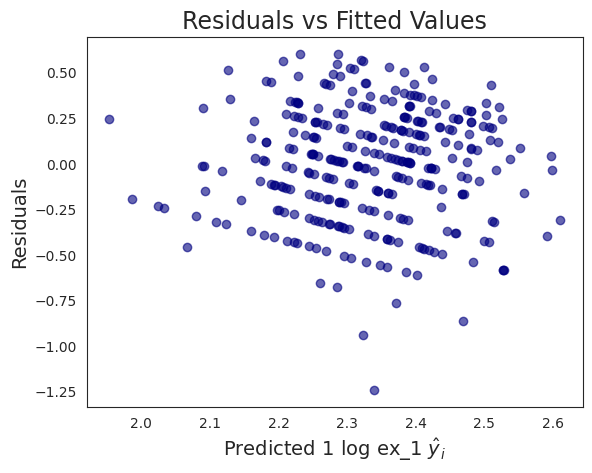

In [49]:
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted 1 log ex_1 $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)
plt.show()

Из рисунка видно, что ошибки не случайны.
Это значит, что у нас нет параметров в модели (возможно не стоило удалять некоторые колонки)

Далее посмотрим распределние наших ошибок на граффике

<ipython-input-50-2d869ed80a4e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.resid, color='navy')


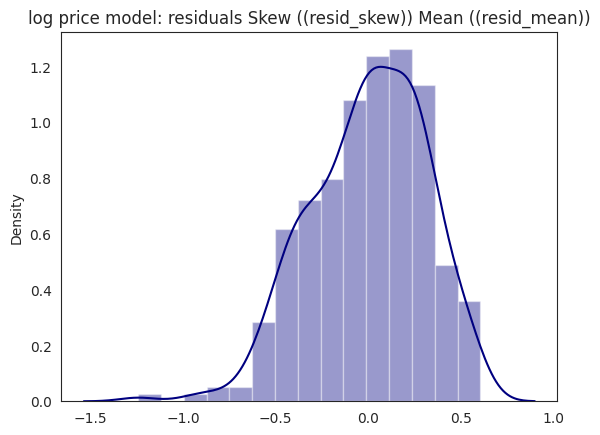

In [50]:
#Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)
sns.distplot(results.resid, color='navy')
plt.title('log price model: residuals Skew ((resid_skew)) Mean ((resid_mean))')
plt.show()

Из граффика видно, что наши ошибки подчиняются закону нормального распределения и это просто отлично. Хоть что-то хорошее...

Т.к наши ошибки подчинаются закону нормального распределния, то мы можем в дальнейшем использовать нашу среднеквадратическую ошибку не только для того, чтобы давать предсказания, а давать вероятность получения оценки за экзамен в определённом интервале с определённой вероятностью.

Если наши данные не подчинаются закону нормального распределния, то их можно невелировать (Напрмиер взять от каждого значения логорифм, чтобы +- их сравнять)

In [58]:
# Наша ошибка попадет в интервал в точность 958
# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3) #Считаем среднеквадратическую всех наших ошибок и округляем до 3
print('2 CКО в логарифмаx', 2*np.sqrt(reduced_log_mse)) #Достаём из него корень и получаем так стандартное отклонение(сигму)
#И считаем 2 таких СКО в логорифмах

upper_bound = np.log(0.0019) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in normal estimation ', np.e**upper_bound * 1000)

lower_bound = np.log(0.0019) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in normal estimation ', np.e**lower_bound * 1000)

2 CКО в логарифмаx 0.6260990336999411
The upper bound in normal estimation  3.5535706676914325
The lower bound in normal estimation  1.015879614502004


Псоледняя ячейка - интересная тема, но я не понял, как это интерпретировать под нашу таблицу, но это в целом и не нужно